In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/createcard/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
sumOnces = 0
sumZeros = 0
for i in df['Class']:
    sumZeros += 1 if i == 0 else 0
    sumOnces += 1 if i == 1 else 0
print(sumZeros)
print(sumOnces)

284315
492


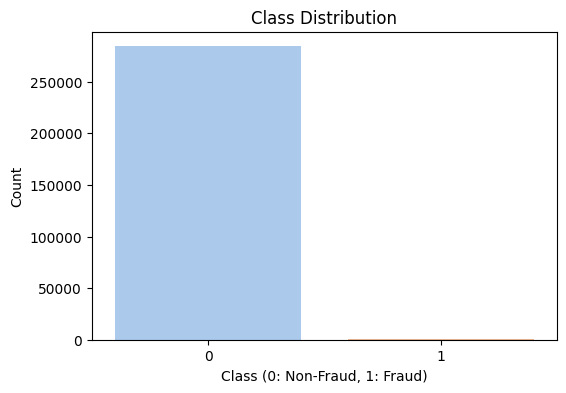

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

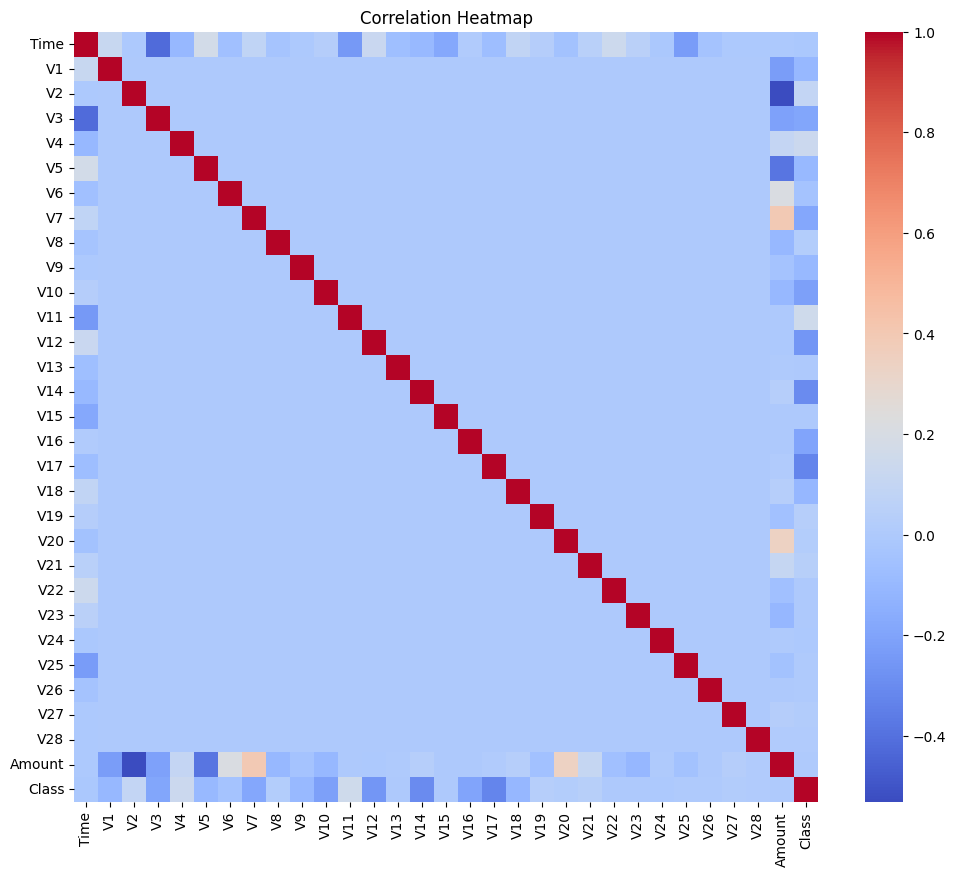

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

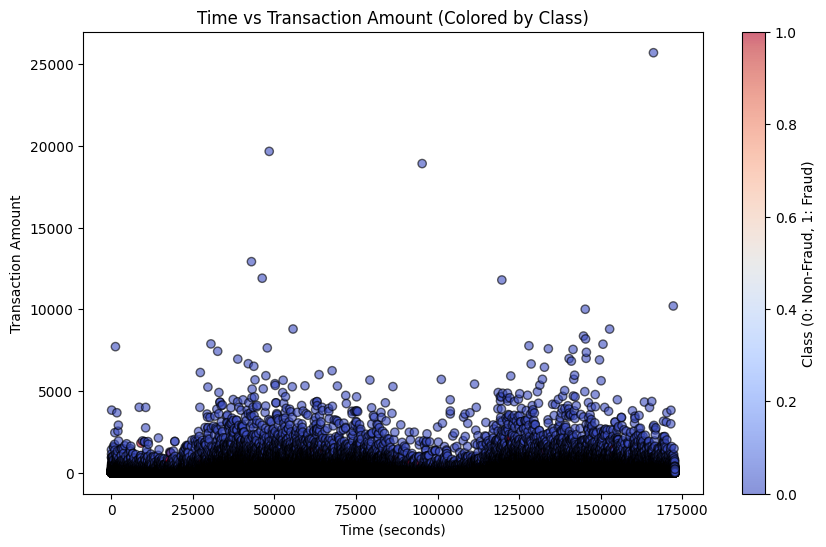

In [8]:
# Scatter plot of Time vs. Amount colored by Class
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], alpha=0.6, c=df['Class'], cmap='coolwarm', edgecolor='k')
plt.title('Time vs Transaction Amount (Colored by Class)')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Non-Fraud, 1: Fraud)')
plt.show()

/tmp/ipykernel_17/3981729706.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Amount'], bins=50, kde=True, palette='coolwarm', log_scale=(False, True))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


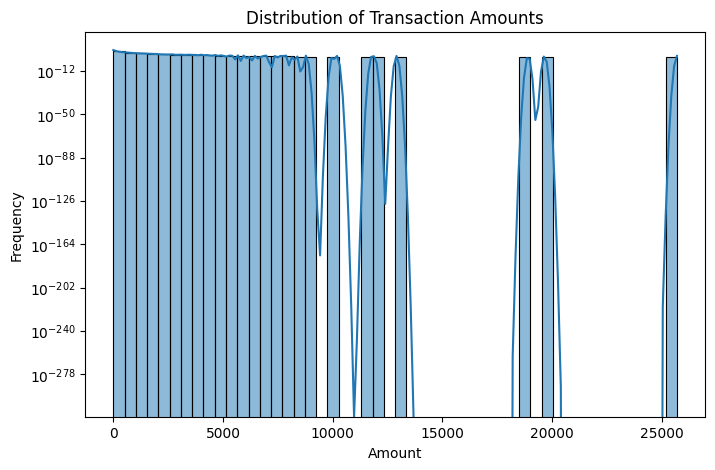

In [9]:
# Distribution of transaction amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True, palette='coolwarm', log_scale=(False, True))
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

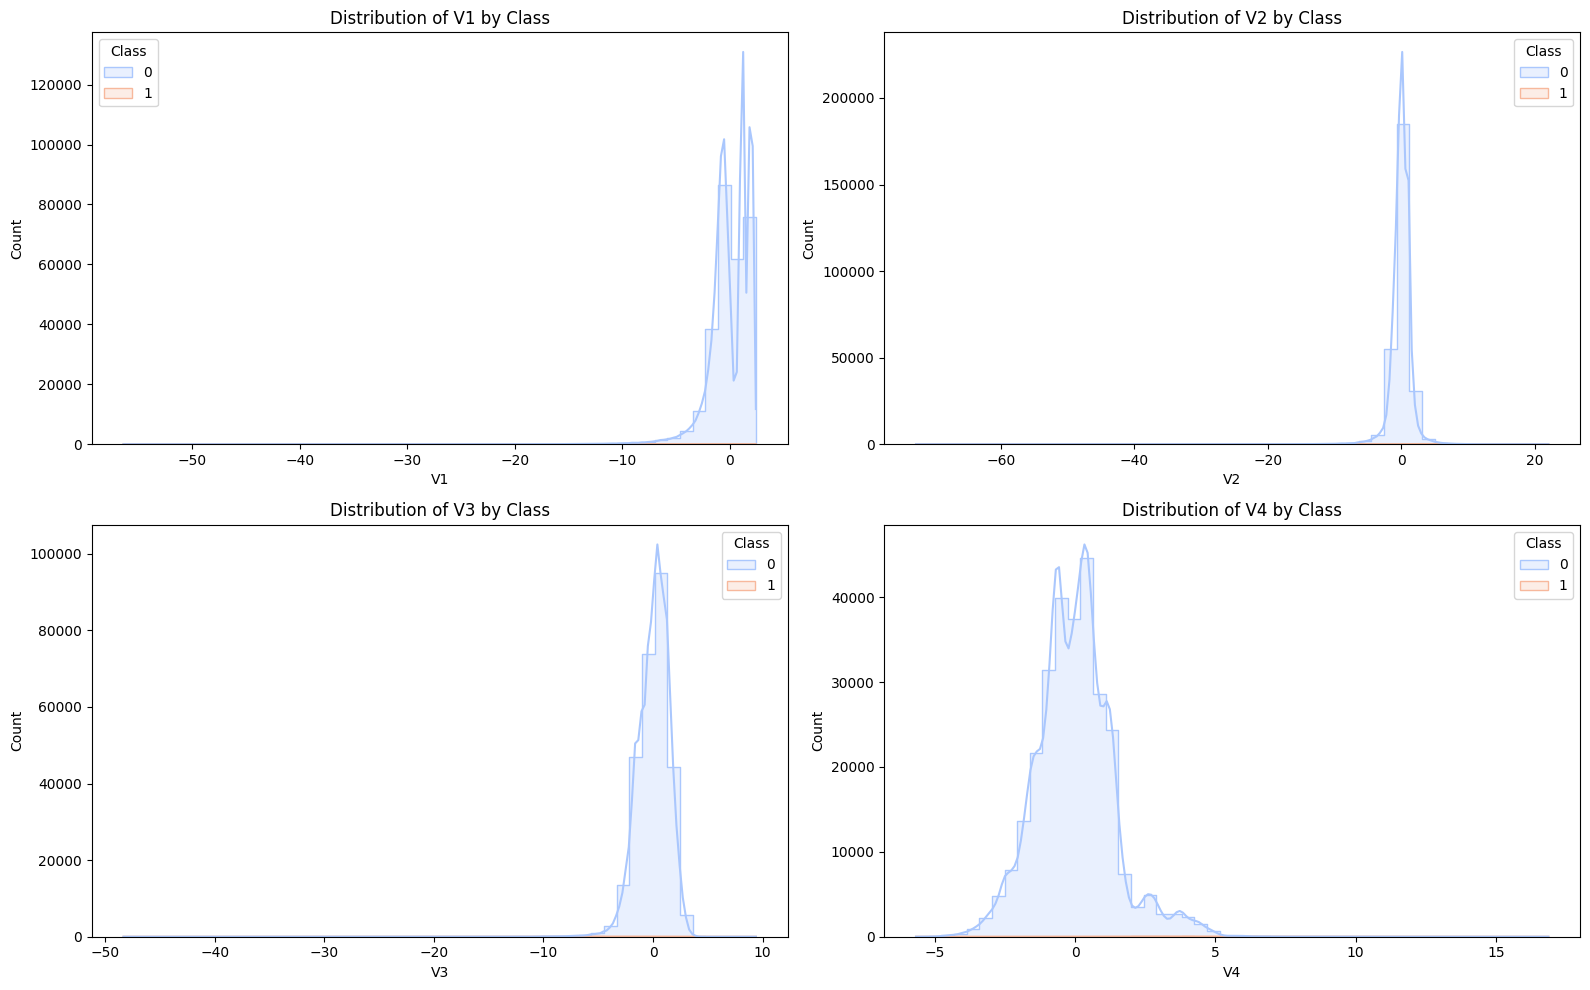

In [10]:
# Distribution plots for selected PCA features
selected_features = ['V1', 'V2', 'V3', 'V4']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue='Class', kde=True, bins=50, palette='coolwarm', element='step')
    plt.title(f'Distribution of {feature} by Class')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

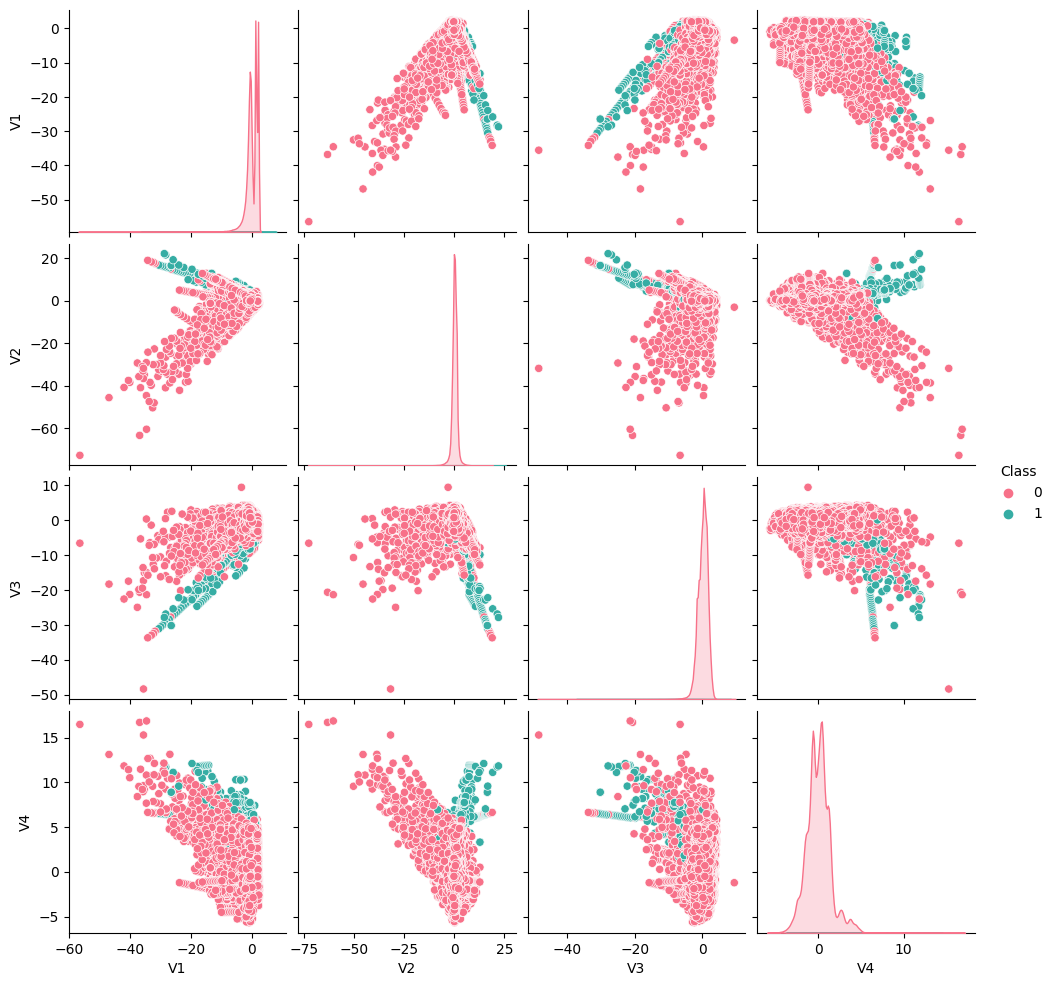

In [11]:
# Pairplot of selected PCA features
selected_features = ['V1', 'V2', 'V3', 'V4', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='kde', palette='husl')
plt.show()

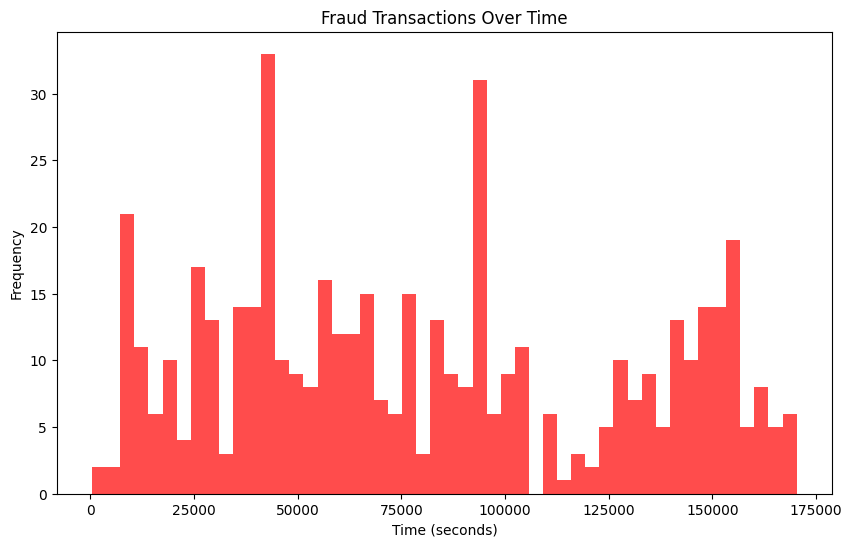

In [12]:
# Fraud transactions over time
fraud = df[df['Class'] == 1]
plt.figure(figsize=(10, 6))
plt.hist(fraud['Time'], bins=50, color='red', alpha=0.7)
plt.title('Fraud Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

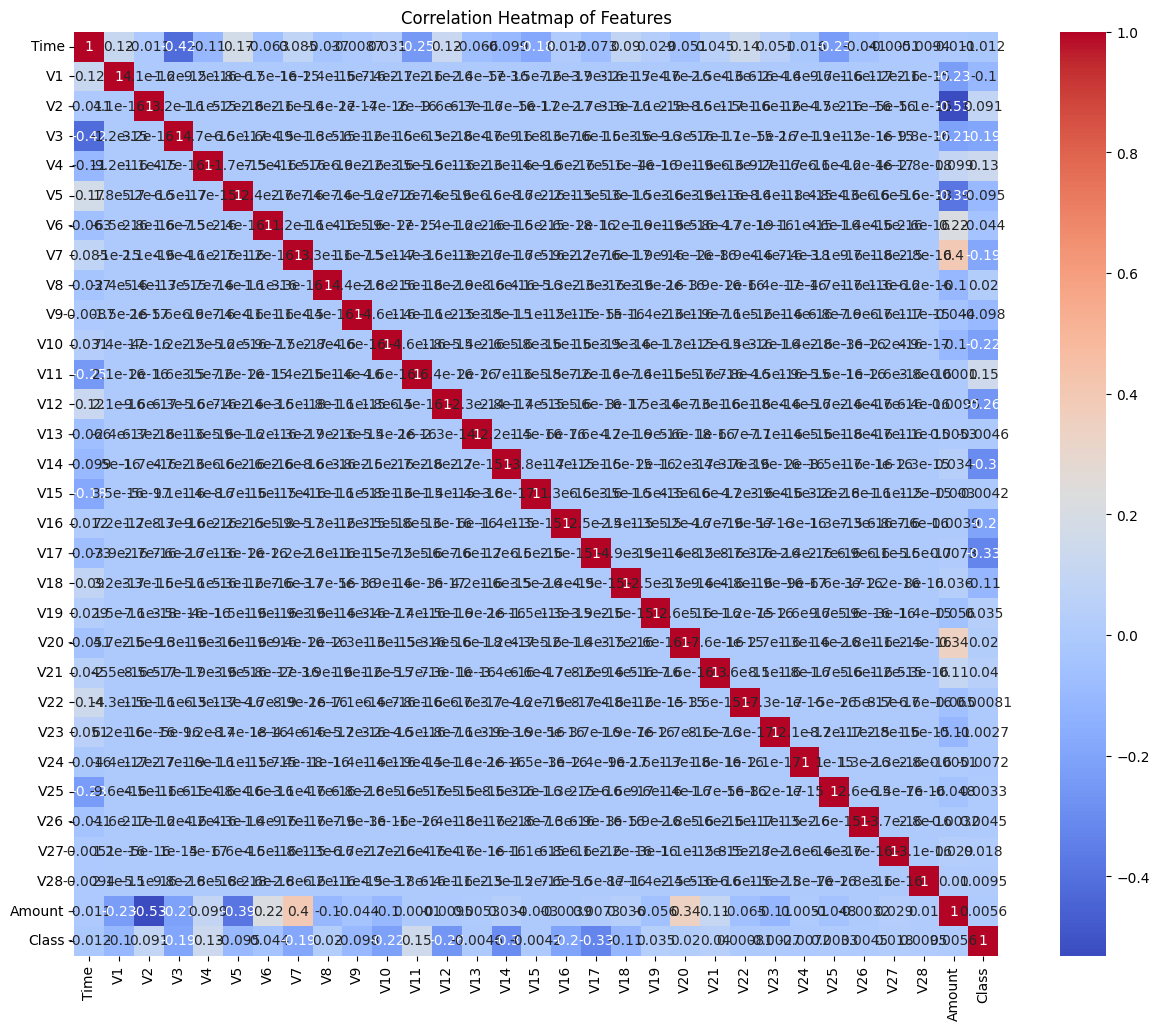

In [13]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

# **Pre-processing**

In [14]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Data:", missing_data)
#df_clean = df.dropna()

Missing Data: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

In [16]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['V1', 'V2', 'V3', 'V4', 'Amount']])  # Choose the columns for scaling
df[['V1', 'V2', 'V3', 'V4', 'Amount']] = scaled_data

In [18]:
# For example, using IQR for detecting outliers
from scipy.stats import iqr

Q1 = np.percentile(df['Amount'], 25)
Q3 = np.percentile(df['Amount'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Outliers in 'Amount': {len(outliers)}")

Outliers in 'Amount': 31904


In [19]:
# # Option to remove outliers
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [20]:
from sklearn.model_selection import train_test_split

# Split data into train and test data
X = df.drop(['Class'], axis=1)
y = df['Class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#ratio of Amount to Time
df['Amount_to_Time'] = df['Amount'] / (df['Time'] + 1)

# Model training()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df.drop(['Class'], axis=1)  # Features (excluding the target column)
y = df['Class']  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Feature scaling (especially important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LogisticRegression**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
LogisticRegression_Accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {LogisticRegression_Accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9991
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



**DecisionTreeClassifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

DecisionTree_Accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {DecisionTree_Accuracy:.4f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Overall Accuracy: 0.9995


**RandomForestClassifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

RandomForest_Accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {RandomForest_Accuracy:.4f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Overall Accuracy: 0.9995


**xgboost**

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

Xgboost_Accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {Xgboost_Accuracy:.4f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Overall Accuracy: 0.9996


**SVC**

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Sampling the first 10,000 rows of the dataset to speed up the training process
X_train_sampled = X_train[:10000]
y_train_sampled = y_train[:10000]

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sampled)
X_test_scaled = scaler.transform(X_test)

# Initializing the SVC model with a linear kernel
model = SVC(kernel='linear', C=1.0, random_state=42)

# Training the model on the sampled data
model.fit(X_train_scaled, y_train_sampled)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Printing classification report to evaluate performance
print(classification_report(y_test, y_pred))

# Calculating and printing overall accuracy
SVC_Accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {SVC_Accuracy}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.59      0.49      0.53        98

    accuracy                           1.00     56962
   macro avg       0.79      0.74      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Overall Accuracy: 0.9985253326779256


In [28]:
results = {
    "Logistic Regression": LogisticRegression_Accuracy,
    "Decision Tree": DecisionTree_Accuracy,
    "Random Forest": RandomForest_Accuracy,
    "XGBoost": Xgboost_Accuracy,
    "SVM": SVC_Accuracy
}

for k, v in results.items():
    print(f"{k} -> {v:.4f}")
    
# Best model
best_model = max(results, key=results.get)
print(f"The best model is: {best_model} with an accuracy of {results[best_model]:.4f}")

Logistic Regression -> 0.9991
Decision Tree -> 0.9995
Random Forest -> 0.9995
XGBoost -> 0.9996
SVM -> 0.9985
The best model is: XGBoost with an accuracy of 0.9996
